In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'FB']

In [21]:
# import urllib.request
# import urllib.parse
# data = {}
# data['name'] = 'Somebody Here'
# data['location'] = 'Northampton'
# data['language'] = 'Python'
# url_values = urllib.parse.urlencode(data)
# print(url_values)  # The order may differ from below.  
# url = 'http://www.example.com/example.cgi'
# full_url = url + '?' + url_values
# data = urllib.request.urlopen(full_url)

In [22]:
# create empty dict
news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
# Some websites dislike being browsed by programs, or send different versions to different browsers. 
# By default urllib identifies itself as Python-urllib/x.y (where x and y are the major and minor version 
# numbers of the Python release, e.g. Python-urllib/2.5), which may confuse the site, or just plain not work. 
# The way a browser identifies itself is through the 'User-Agent' header (can be whatever). 
# When you create a Request object you can pass a dictionary of headers in.
    req = Request(url=url, headers={'user-agent': 'my-app'})
#     print(req)
#     break
    
    response = urlopen(req)
#     print(response)
#     break 

#   meantion that we are using html parser
    html = BeautifulSoup(response, features='html.parser')
#     print(html)
#     break
    
    news_table = html.find(id='news-table')
#     print(news_table)
#     break
    
    news_tables[ticker] = news_table
#     print(news_table)
#     break

In [24]:
parsed_data = []

# .items()??
for ticker, news_table in news_tables.items():
#   get a list of table rows
    for row in news_table.findAll('tr'):


#       The <a> tag defines a hyperlink. The most important attribute of the <a> element is the href attribute, 
#       which indicates the link's destination.
        title = row.a.text
#         print(title)
#         break
        
        date_data = row.td.text.split(' ')
#         print(date_data)
#         break


#       meaning if we only have a timestamp, no date
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
#         print(time)
#         print(date)
#         break

        parsed_data.append([ticker, date, time, title])
#         print(parsed_data)
#         break

In [16]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [17]:
vader = SentimentIntensityAnalyzer()

# 
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

In [18]:
df.head()

,ticker,date,time,title,compound
0,AMZN,2021-01-20,08:19PM,Indian stock exchanges approve $3.4B Reliance ...,0.1779
1,AMZN,2021-01-20,07:20PM,Amazon offers to help Bidens effort to quickly...,0.5267
2,AMZN,2021-01-20,06:20PM,Amazon is offering Biden a hand distributing t...,0.5994
3,AMZN,2021-01-20,05:57PM,How Netflixs overseas expansion fueled its exp...,0.3818
4,AMZN,2021-01-20,05:34PM,Here Is Whats Behind Todays Big Tech Stock Rally,0.0000


In [41]:
# df.groupby(['ticker', 'date']).head(2)
# df.groupby(['ticker', 'date']).mean()
df.groupby(['ticker', 'date']).mean().unstack()

compound                                                         \
date   2021-01-13 2021-01-14 2021-01-15 2021-01-16 2021-01-17 2021-01-18   
ticker                                                                     
AMZN     0.131162   0.101519   0.124184   0.177400   0.263350   0.193683   
FB      -0.107527  -0.119364  -0.150991  -0.128071  -0.371200   0.016765   
GOOG    -0.057520  -0.094742   0.018692  -0.068400  -0.159225  -0.151250   

                              
date   2021-01-19 2021-01-20  
ticker                        
AMZN     0.146886   0.213574  
FB       0.059321   0.083227  
GOOG     0.015129   0.134671

<Figure size 720x576 with 0 Axes>

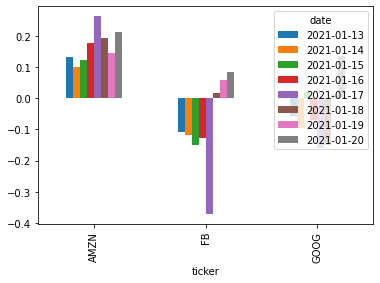

In [43]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
# compound score, .xs()?
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()